# Chat GPT for an End to End Data Science Project- Loan Dataset

## Adim 1- Exploratory Data Analysis(EDA)

First 5 rows of the dataset:
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid

<ipython-input-2-0e80101c4a22>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='not.fully.paid', palette='Set2')


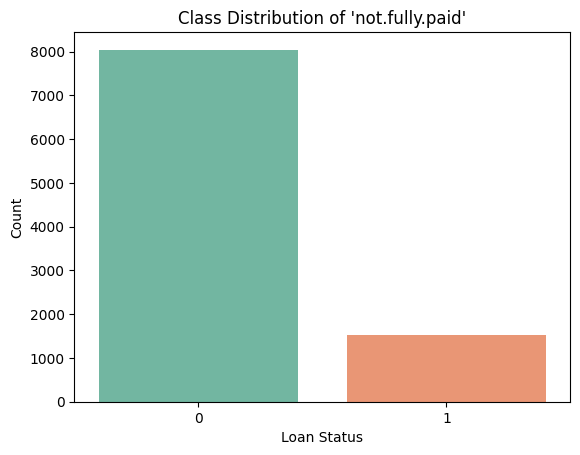


Correlation Matrix:
                int.rate  installment  log.annual.inc       dti      fico  \
int.rate        1.000000     0.276140        0.056383  0.220006 -0.714821   
installment     0.276140     1.000000        0.448102  0.050202  0.086039   
log.annual.inc  0.056383     0.448102        1.000000 -0.054065  0.114576   
dti             0.220006     0.050202       -0.054065  1.000000 -0.241191   
fico           -0.714821     0.086039        0.114576 -0.241191  1.000000   
revol.bal       0.092527     0.233625        0.372140  0.188748 -0.015553   
revol.util      0.464837     0.081356        0.054881  0.337109 -0.541289   
inq.last.6mths  0.202780    -0.010419        0.029171  0.029189 -0.185293   
delinq.2yrs     0.156079    -0.004368        0.029203 -0.021792 -0.216340   
pub.rec         0.098162    -0.032760        0.016506  0.006209 -0.147592   
not.fully.paid  0.159552     0.049955       -0.033439  0.037362 -0.149666   
credit.policy  -0.294089     0.058770        0.034906 -

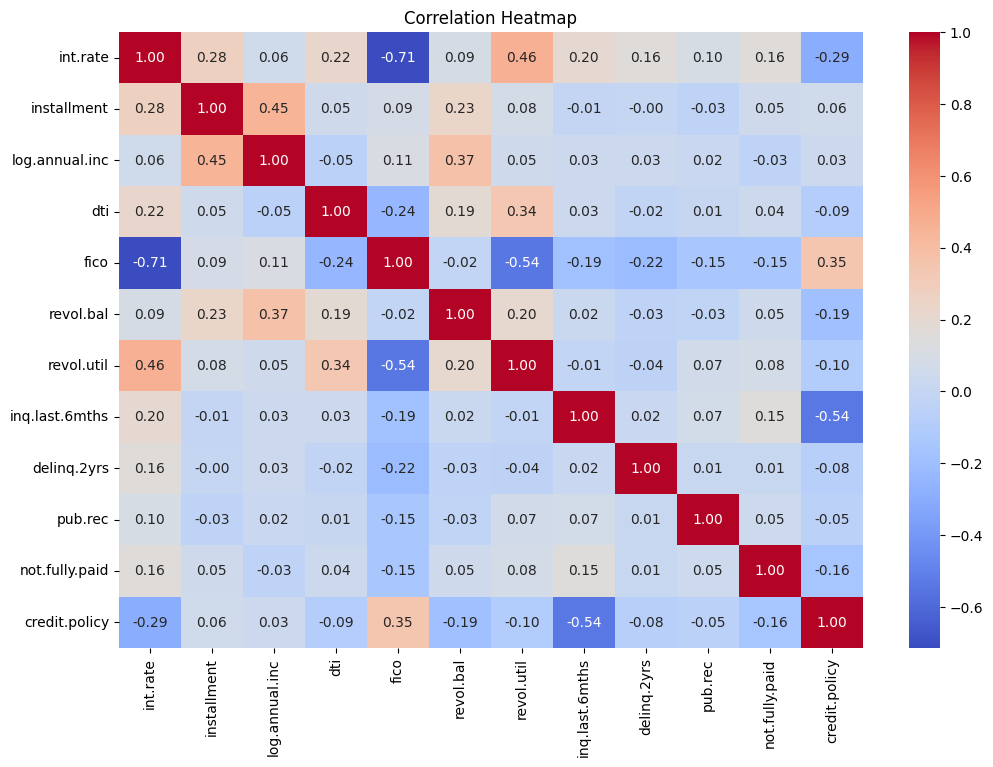

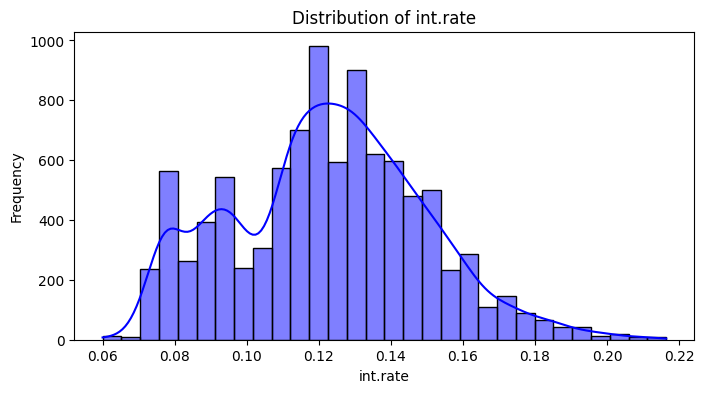

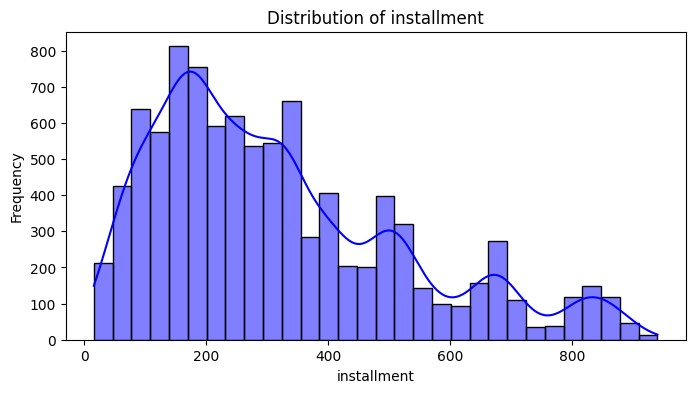

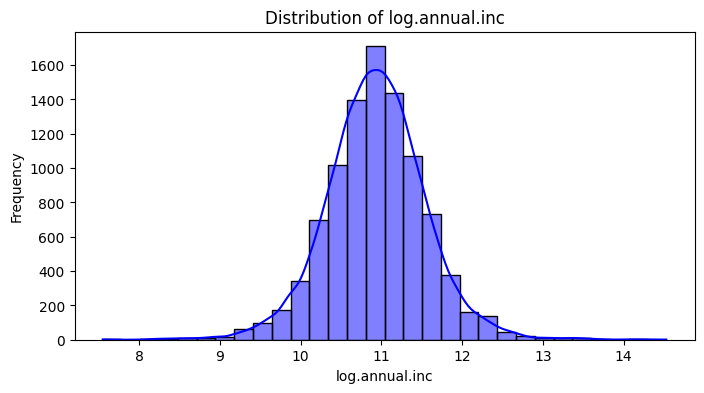

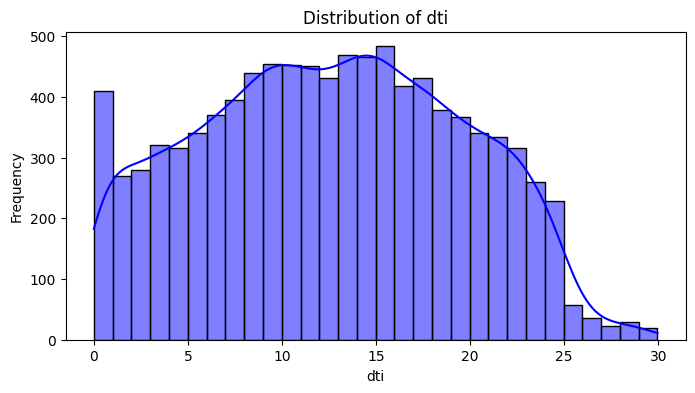

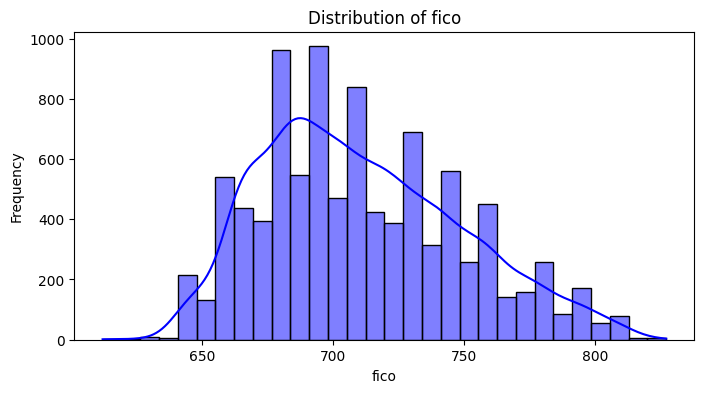

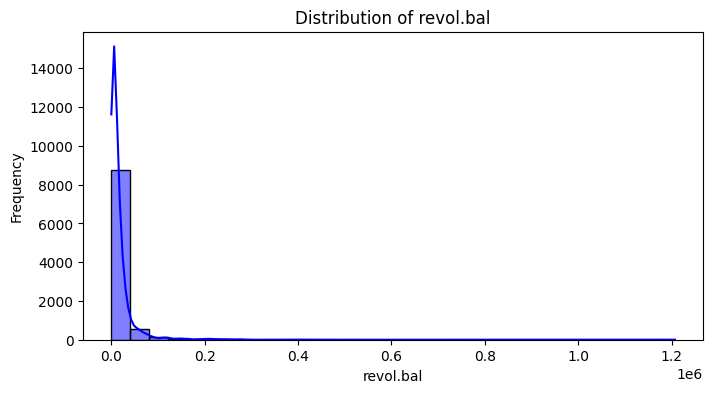

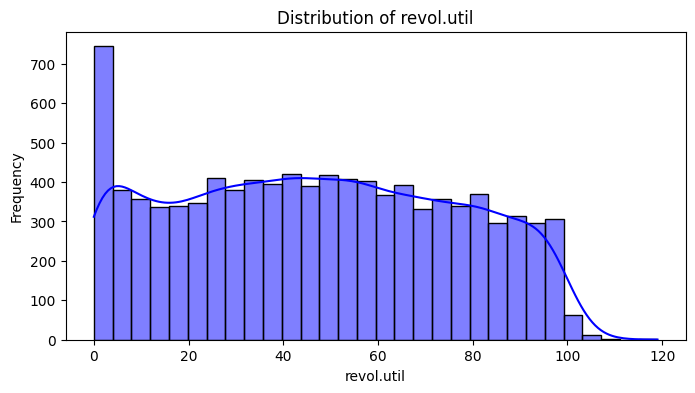

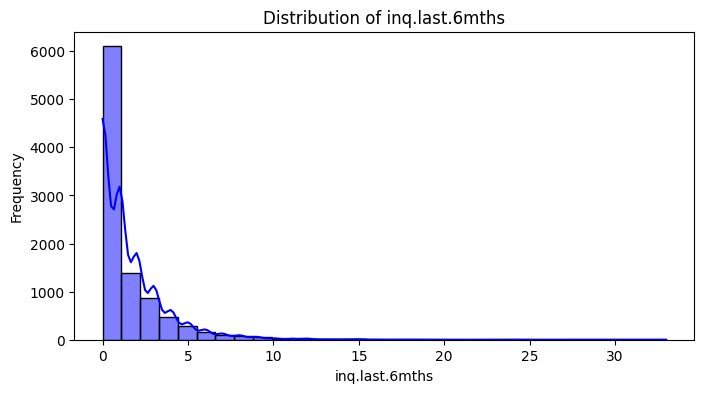

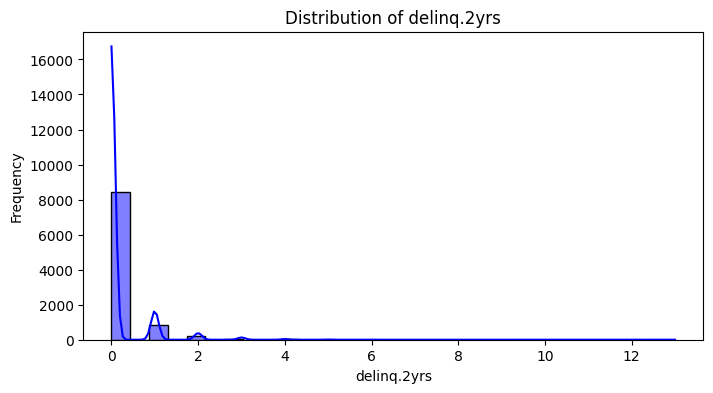

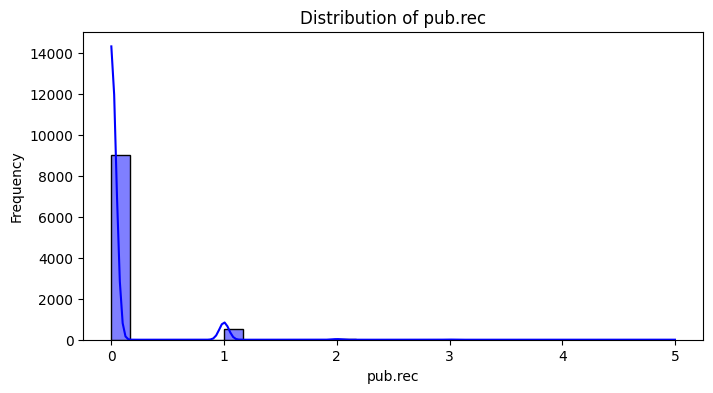

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


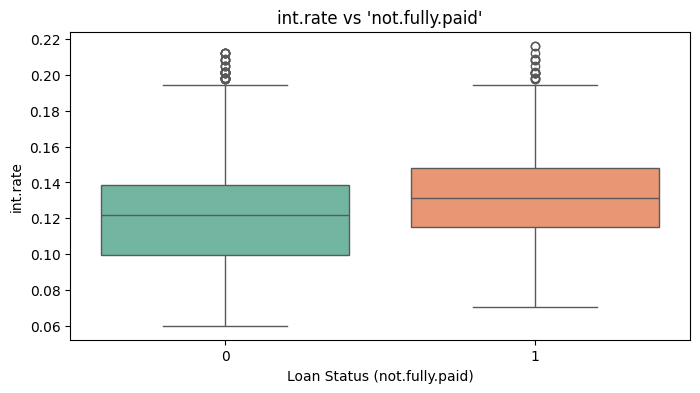

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


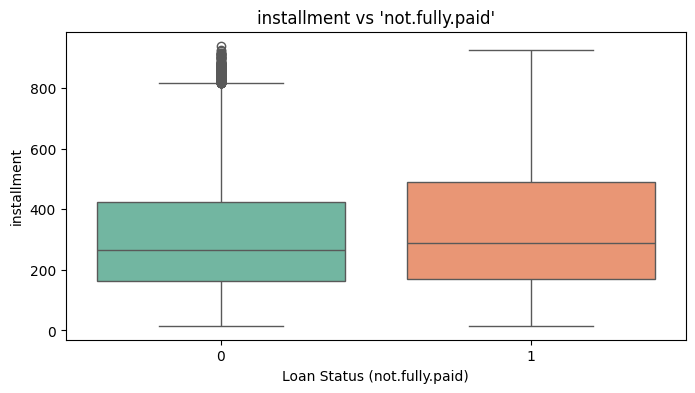

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


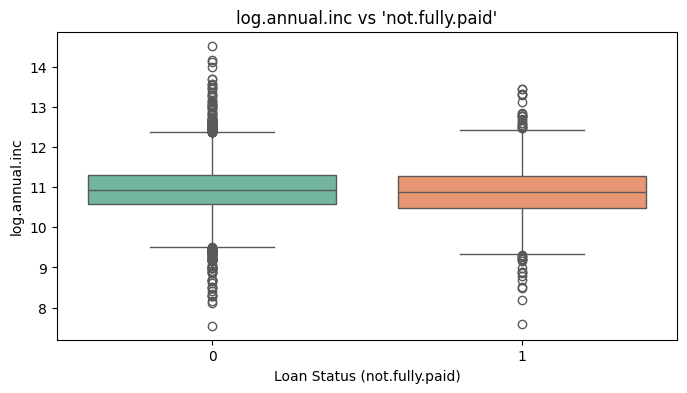

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


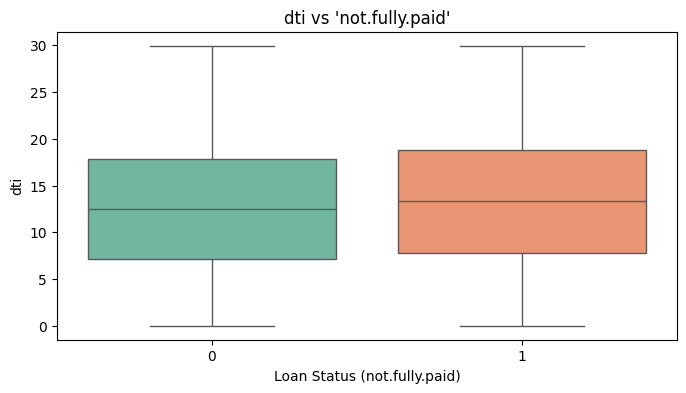

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


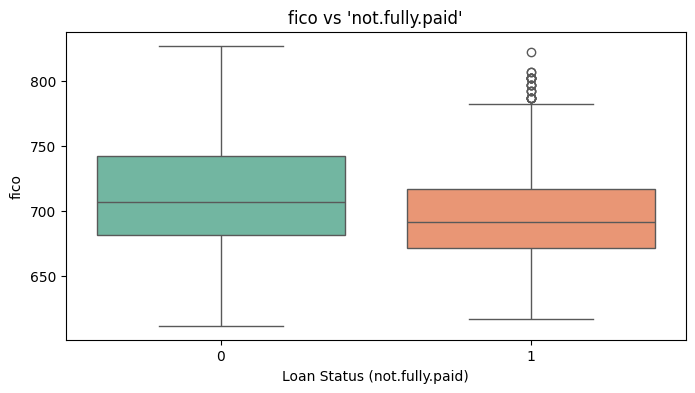

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


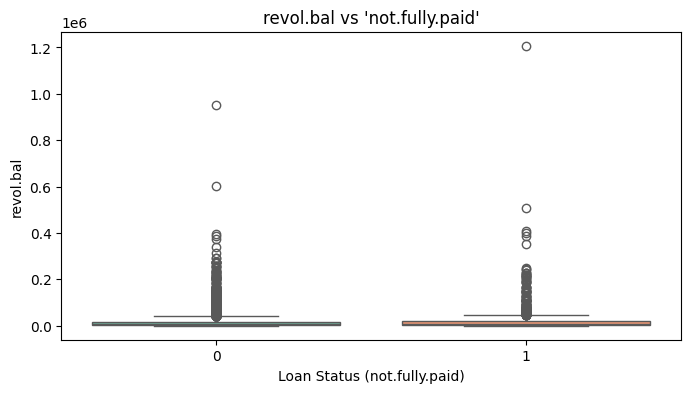

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


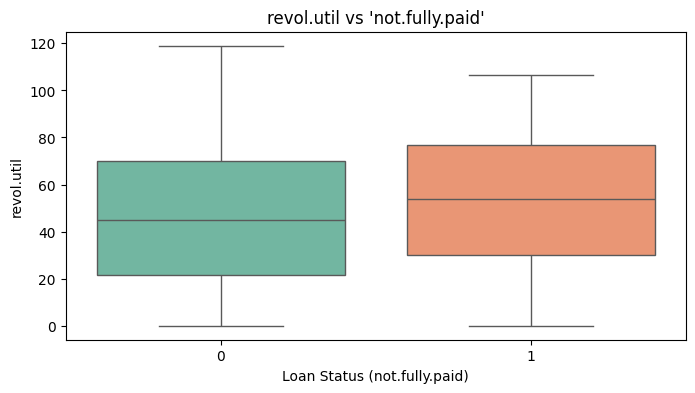

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


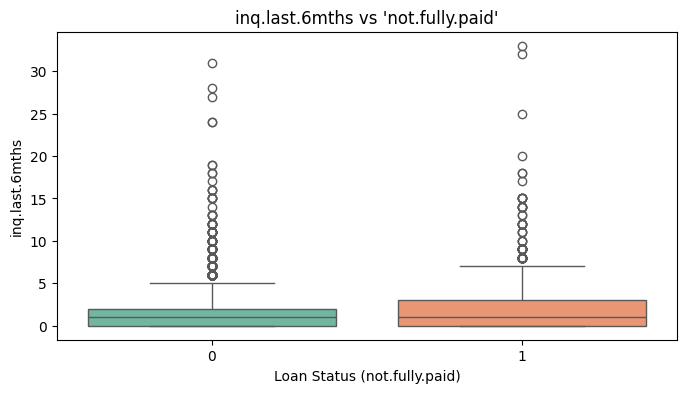

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


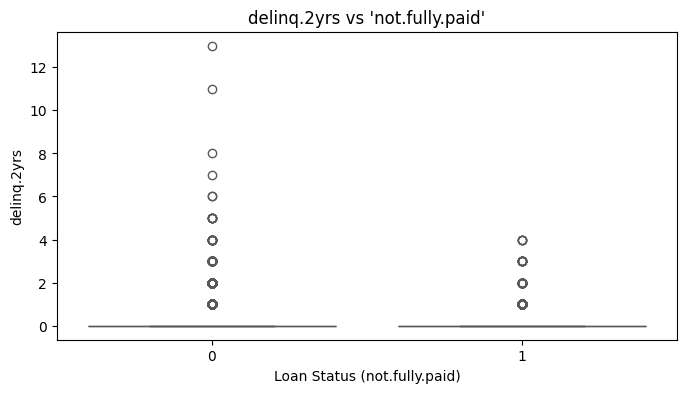

<ipython-input-2-0e80101c4a22>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')


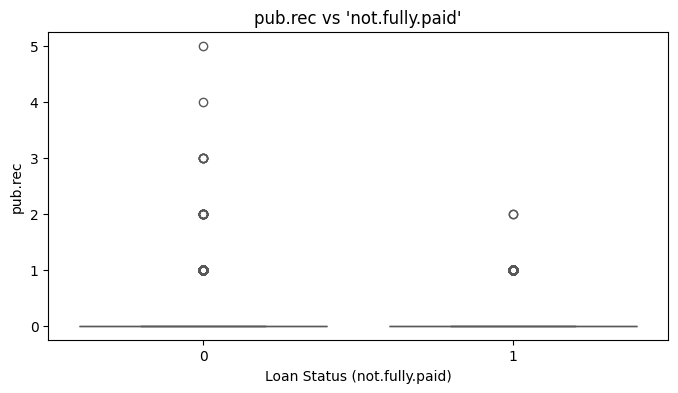

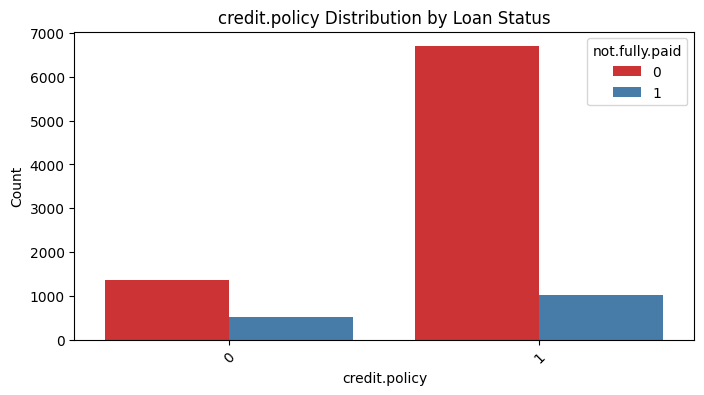

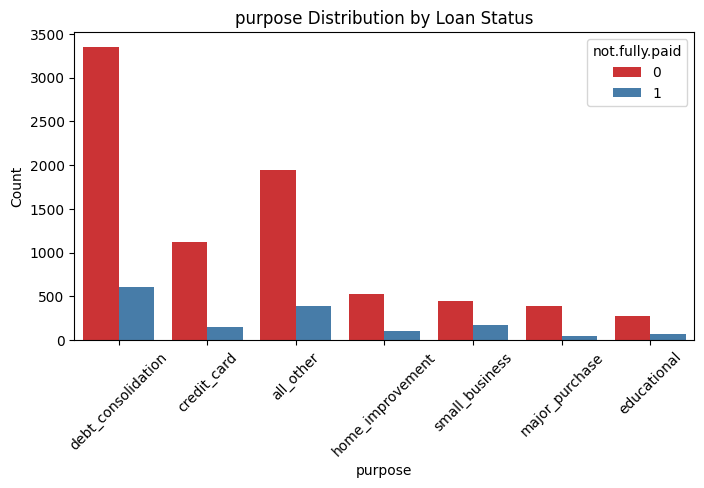

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


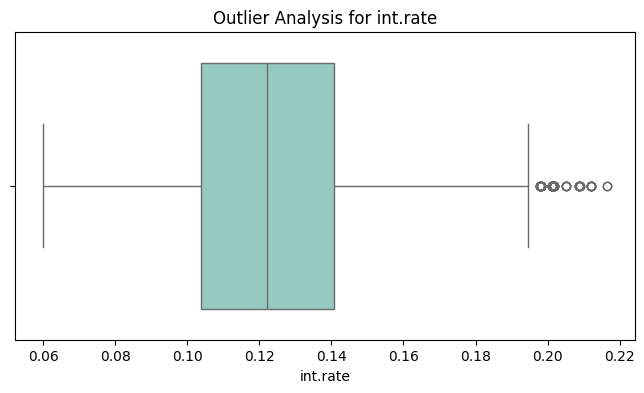

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


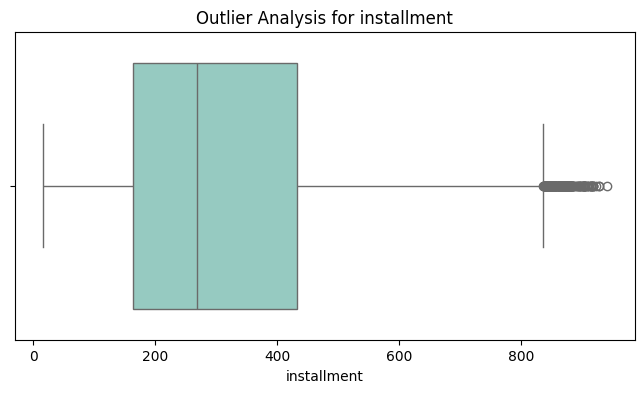

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


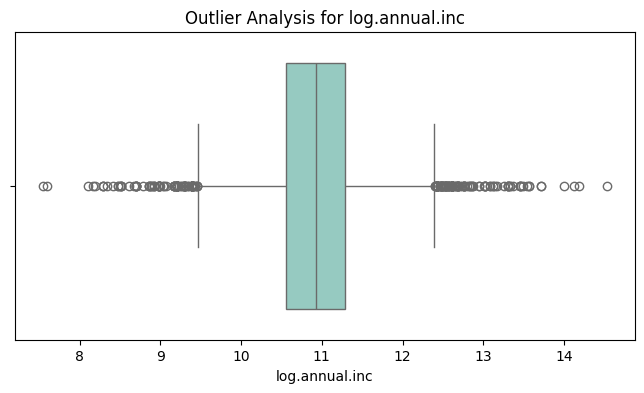

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


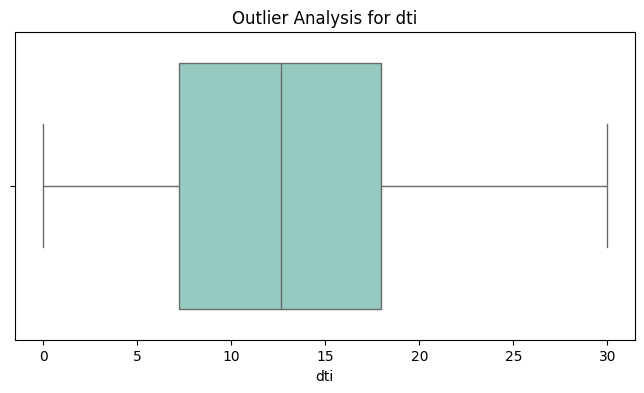

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


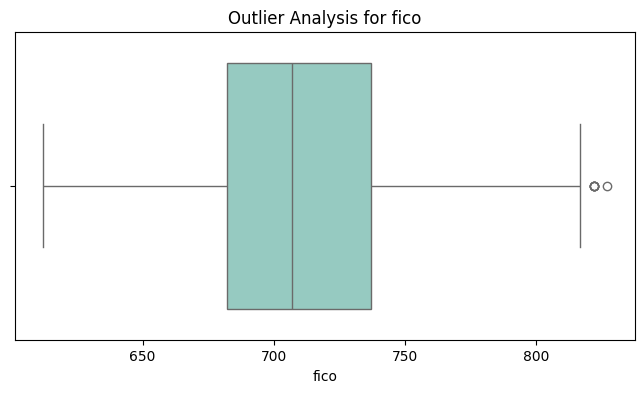

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


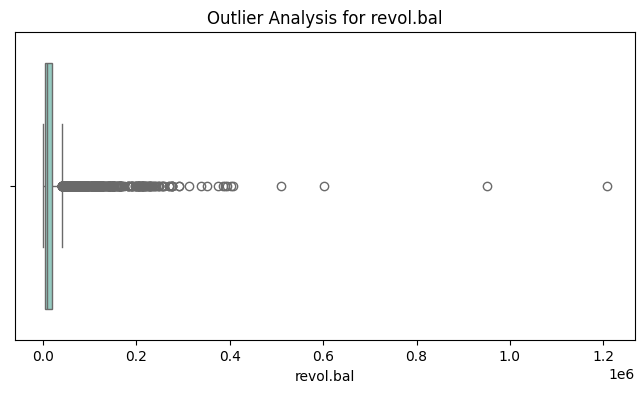

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


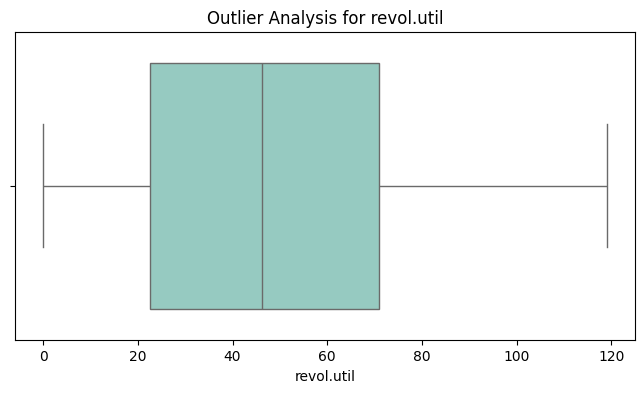

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


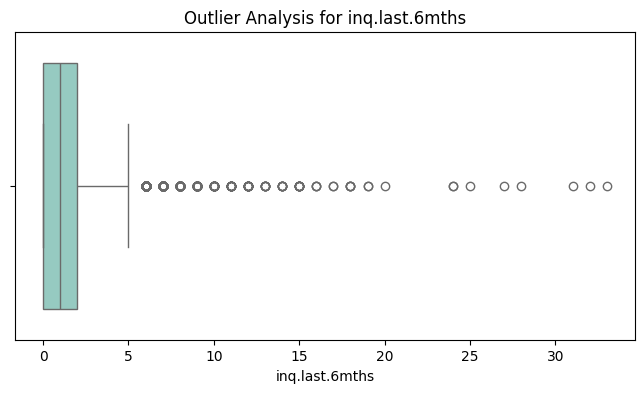

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


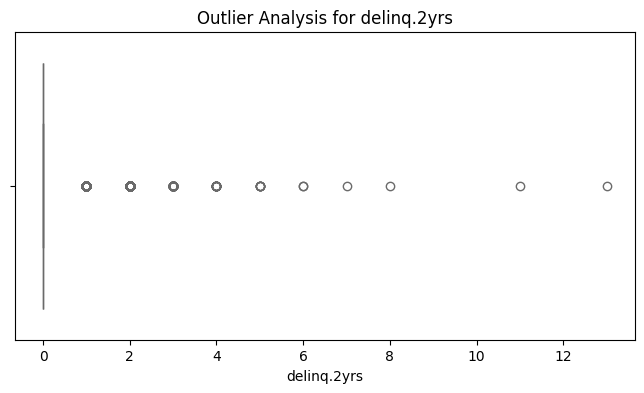

<ipython-input-2-0e80101c4a22>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette="Set3")


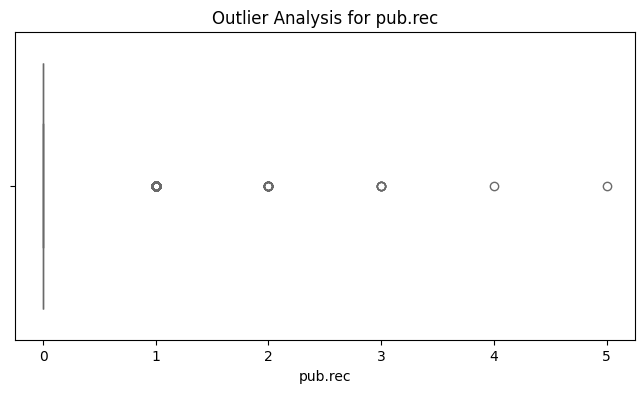


EDA Complete!


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/sample_data/loan_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check dataset shape
print("\nDataset Shape:", df.shape)

# Get dataset information
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Basic statistics for numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())

# Check class distribution of the target variable
print("\nClass Distribution of 'not.fully.paid':")
print(df['not.fully.paid'].value_counts(normalize=True))

# Visualize the class distribution
sns.countplot(data=df, x='not.fully.paid', palette='Set2')
plt.title("Class Distribution of 'not.fully.paid'")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Correlation matrix
print("\nCorrelation Matrix:")
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti',
                      'fico', 'revol.bal', 'revol.util', 'inq.last.6mths',
                      'delinq.2yrs', 'pub.rec','not.fully.paid','credit.policy']
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Numerical features distribution
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti',
                      'fico', 'revol.bal', 'revol.util', 'inq.last.6mths',
                      'delinq.2yrs', 'pub.rec']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Boxplots of numerical features grouped by the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='not.fully.paid', y=feature, palette='Set2')
    plt.title(f"{feature} vs 'not.fully.paid'")
    plt.xlabel("Loan Status (not.fully.paid)")
    plt.ylabel(feature)
    plt.show()

# Categorical features analysis
categorical_features = ['credit.policy', 'purpose']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='not.fully.paid', palette='Set1')
    plt.title(f"{feature} Distribution by Loan Status")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Check for outliers using boxplots
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature, palette="Set3")
    plt.title(f"Outlier Analysis for {feature}")
    plt.xlabel(feature)
    plt.show()

print("\nEDA Complete!")

# Adim - 2 - Feature Enginering
- Prompt: “Write a Python code to perform feature engineering”

In [3]:
# Perform feature engineering
df["installment_to_income_ratio"] = (
    df["installment"] / df["log.annual.inc"]
)
df["credit_history"] = (df["delinq.2yrs"] + df["pub.rec"]) / df[
    "fico"
]

In [4]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Dropping unnecessary columns
#columns_to_drop = ['credit.policy', 'days.with.cr.line', 'purpose']  # As per your earlier input
#df = df.drop(columns=columns_to_drop)

# Handling missing values
# Fill numerical missing values with the median
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti',
                      'fico', 'revol.bal', 'revol.util', 'inq.last.6mths',
                      'delinq.2yrs', 'pub.rec']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Fill missing values in categorical features with the mode
df['not.fully.paid'] = df['not.fully.paid'].fillna(df['not.fully.paid'].mode()[0])

# Feature scaling and encoding
# Separating features and target variable
X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

# List of categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define transformers
# Check if categorical features exist before creating the OneHotEncoder
if categorical_features:  # If categorical_features is not empty
    categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
else:
    categorical_transformer = 'passthrough' # If no categorical features, skip transformation

numerical_transformer = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

# Convert transformed data into a DataFrame
# Get feature names from transformers
# Only get OneHotEncoder feature names if it was used
if categorical_features:
    onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(onehot_feature_names)
else:
    all_feature_names = numerical_features  # If no categorical features, use numerical feature names

X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Output the transformed dataset
print("\nTransformed Features Shape:", X_transformed_df.shape)
print("First 5 rows of transformed data:")
print(X_transformed_df.head())

print("\nFeature Engineering Complete!")


Transformed Features Shape: (9578, 20)
First 5 rows of transformed data:
   credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0       0.492222 -0.139318     2.463099        0.680388  0.998505  0.688825   
1       0.492222 -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2       0.492222  0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3       0.492222 -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4       0.492222  0.743509    -1.043992        0.597961  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.432230   0.353732    0.182704       -0.716989    -0.299730   
1          -0.721230   0.495018    1.030602       -0.716989    -0.299730   
2           0.059770  -0.397073   -0.730683       -0.262470    -0.299730   
3          -0.745277   0.496321    0.909966       -0.262470    -0.299730   
4          -0.198161  -0.360663   -0.251586       -0.716989     1.53114

Handling class imbalancing

In [6]:
!pip install -U imbalanced-learn
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
# ... (Your existing code to load and preprocess data) ...

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the 'purpose' column
df['purpose'] = encoder.fit_transform(df['purpose'])

# Now apply SMOTE
sm = SMOTE(random_state=42)
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_resampled, y_resampled = sm.fit_resample(X, y)


df = pd.concat([X_resampled, y_resampled], axis=1)
df['not.fully.paid'].value_counts()



,count
not.fully.paid,
0,8045
1,8045


# Model Selection

In [8]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Perform model selection using cross-validation
cv_results = {}

print("\nEvaluating models...")
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_transformed, y, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = scores
    print(f"{model_name}:")
    print(f"  Mean Accuracy: {scores.mean():.2f}")
    print(f"  Standard Deviation: {scores.std():.2f}")

# Select the best model
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
best_model_mean_accuracy = cv_results[best_model_name].mean()
print("\nBest Model:")
print(f"  {best_model_name} with Mean Accuracy: {best_model_mean_accuracy:.2f}")



Evaluating models...
Decision Tree:
  Mean Accuracy: 0.65
  Standard Deviation: 0.19
Random Forest:
  Mean Accuracy: 0.73
  Standard Deviation: 0.22
Logistic Regression:
  Mean Accuracy: 0.73
  Standard Deviation: 0.22
SVM:
  Mean Accuracy: 0.73
  Standard Deviation: 0.21

Best Model:
  SVM with Mean Accuracy: 0.73


In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))

Decision Tree Classifier Accuracy: 79.10%
Random Forest Classifier Accuracy: 85.89%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Classifier Accuracy: 58.92%
Support Vector Machine Classifier Accuracy: 51.52%


# Hyperparameter tuning and Model Evaluaation

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Best hyperparameters:", best_params)

Random Forest Classifier Evaluation Results:
Accuracy: 86.76%
Precision: 88.45%
Recall: 84.18%
F1 Score: 86.26%
Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [12]:
import joblib
# Save the model to disk
joblib.dump(best_model, 'loan_classifier.pkl')

['loan_classifier.pkl']

In [14]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [18]:
import gradio as gr
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the saved model
model = joblib.load("/content/loan_classifier.pkl")

# Define the features to use in the app
feature_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
                   'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Define the preprocessing steps
scaler = StandardScaler()

def preprocess_input(input_data):
    """
    Preprocess input data for prediction.
    """
    df = pd.DataFrame([input_data], columns=feature_columns)
    df_scaled = scaler.fit_transform(df)
    return df_scaled

# Define the prediction function to show probabilities
def predict_loan_probability(int_rate, installment, log_annual_inc, dti, fico, revol_bal,
                              revol_util, inq_last_6mths, delinq_2yrs, pub_rec):
    """
    Predict the class probabilities of whether a loan will not be fully paid.
    """
    input_data = {
        'int.rate': int_rate,
        'installment': installment,
        'log.annual.inc': log_annual_inc,
        'dti': dti,
        'fico': fico,
        'revol.bal': revol_bal,
        'revol.util': revol_util,
        'inq.last.6mths': inq_last_6mths,
        'delinq.2yrs': delinq_2yrs,
        'pub.rec': pub_rec
    }
    processed_input = preprocess_input(input_data)
    probabilities = model.predict_proba(processed_input)
    return {
        "Fully Paid (Class 0)": f"{probabilities[0][0]:.2f}",
        "Not Fully Paid (Class 1)": f"{probabilities[0][1]:.2f}"
    }

# Create the Gradio interface
inputs = [
    gr.Number(label="Interest Rate (int.rate)"),
    gr.Number(label="Installment Amount (installment)"),
    gr.Number(label="Log of Annual Income (log.annual.inc)"),
    gr.Number(label="Debt-to-Income Ratio (dti)"),
    gr.Number(label="FICO Score (fico)"),
    gr.Number(label="Revolving Balance (revol.bal)"),
    gr.Number(label="Revolving Utilization Rate (revol.util)"),
    gr.Number(label="Inquiries in Last 6 Months (inq.last.6mths)"),
    gr.Number(label="Delinquencies in Last 2 Years (delinq.2yrs)"),
    gr.Number(label="Public Records (pub.rec)")
]

output = gr.JSON(label="Class Probabilities")

interface = gr.Interface(
    fn=predict_loan_probability,
    inputs=inputs,
    outputs=output,
    title="Loan Default Prediction (Class Probabilities)",
    description="Enter loan details to see the class probabilities for whether the loan will not be fully paid."
)

# Launch the Gradio app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3ffc80707b77a31f25.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
